# MLDL Project

## Importing lib.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# WEEK 1

## Importing Dataset

In [2]:
df = pd.read_csv('cardio_train.csv',sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Shape (ROW/COL)

In [3]:
df.shape

(70000, 13)

## Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


## Target Columns Identification

In [5]:
df['cardio'].value_counts()

cardio
0    35021
1    34979
Name: count, dtype: int64

## Count of Null Values

In [6]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

## Converting Age column values(days) into years. 

In [7]:
df['age'] = df['age'] / 365
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52.712329,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,61.920548,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52.235616,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61.454795,1,163,72.0,135,80,1,2,0,0,0,1


## Add BMI column (BMI = weight / (height/100)^2)

In [8]:
df['BMI'] = df['weight'] / ((df['height']/100)**2)
df[['height','weight','BMI']]

,height,weight,BMI
0,168,62.0,21.967120
1,156,85.0,34.927679
2,165,64.0,23.507805
3,169,82.0,28.710479
4,156,56.0,23.011177
...,...,...,...
69995,168,76.0,26.927438
69996,158,126.0,50.472681
69997,183,105.0,31.353579
69998,163,72.0,27.099251


## Average Age Of Patient With Cardiovascular Disease.

In [9]:
cardiovascular_disease = df[df['cardio'] == 1]
avg_age = cardiovascular_disease['age'].mean()
print("Avg years : ",avg_age)

Avg years :  54.95017268678232


## Distribution of Cardiovascular Disease Cases by Gender and Cholesterol Level

In [10]:
df_copy = df.copy()
df_copy['Gender'] = df_copy['gender'].map({1:'Women',2:'Men'})
df_copy['cholesterol_map'] = df_copy['cholesterol'].map({1:'Normal',2:'Above Normal',3:'Well Above Normal'})
df_copy.pivot_table(values='cardio',index='Gender',columns='cholesterol_map',aggfunc='sum',fill_value=0)

cholesterol_map,Above Normal,Normal,Well Above Normal
Gender,,,
Men,2006,8467,1890
Women,3744,14588,4284


## Average BMI by Activity & Alcohol Consumption

In [11]:
df_copy.groupby(['active', 'alco'])[['BMI']].mean().reset_index()

,active,alco,BMI
0,0,0,27.678899
1,0,1,28.946170
2,1,0,27.500084
3,1,1,27.738549


## Describe

In [12]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,53.339358,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,27.556513
std,28851.302323,6.759594,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.091511
min,0.000000,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.471784
25%,25006.750000,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,50001.500000,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.374068
75%,74889.250000,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.222222
max,99999.000000,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,298.666667


# WEEK 2

In [13]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52.712329,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
69996,99995,61.920548,1,158,126.0,140,90,2,2,0,0,1,1,50.472681
69997,99996,52.235616,2,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,99998,61.454795,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


## Droping ID Column

In [14]:
df.drop(columns=['id'], inplace=True)
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52.712329,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
69996,61.920548,1,158,126.0,140,90,2,2,0,0,1,1,50.472681
69997,52.235616,2,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,61.454795,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


## Counting Duplicated Records

In [15]:
print(df.duplicated().sum())

24


## Removing Duplicated Records

In [16]:
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


## Handle Missing Values

In [17]:
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
BMI            0
dtype: int64

## Handling Outlier

In [18]:
df = df[
    (df['ap_hi'] >= 70) & (df['ap_hi'] <= 250) &
    (df['ap_lo'] >= 40) & (df['ap_lo'] <= 150) &
    (df['ap_hi'] > df['ap_lo'])
]
df = df[(df['height'] >= 140) & (df['height'] <= 200)]
df = df[(df['weight'] >= 40) & (df['weight'] <= 160)]
df['BMI'] = df['BMI'].clip(15, 50)

In [19]:
after_shape = df.shape
after_shape

(68419, 13)

## Histogram Age Distribution(Years)

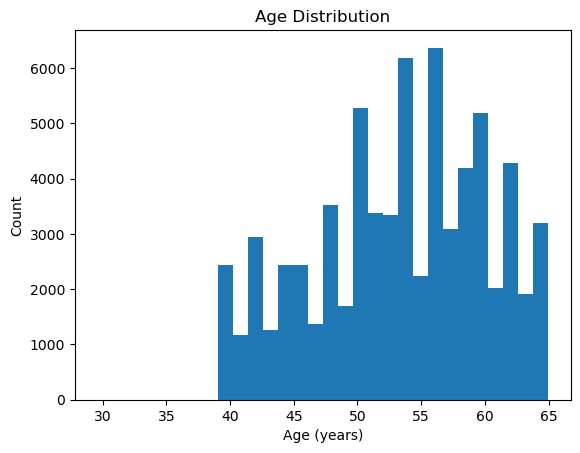

In [20]:
plt.hist(df_copy['age'], bins=30)
plt.title("Age Distribution")
plt.xlabel("Age (years)")
plt.ylabel("Count")
plt.show()

## Histogram For Height & Weight

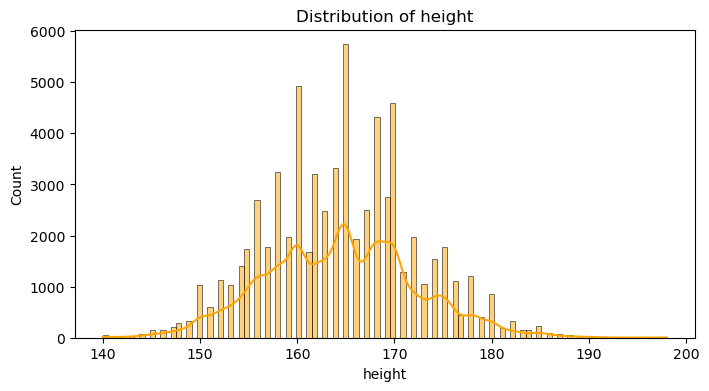

In [21]:
plt.figure(figsize=(8,4))
sns.histplot(data=df,x='height',kde=True,color='orange')
plt.title("Distribution of height")
plt.show()

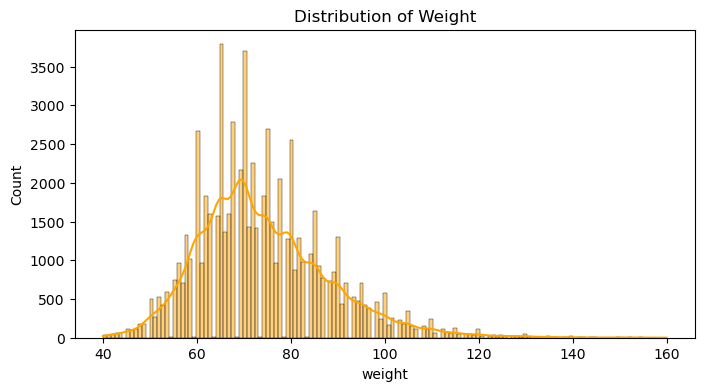

In [22]:
plt.figure(figsize=(8,4))
sns.histplot(data=df,x='weight',kde=True,color='orange')
plt.title("Distribution of Weight")
plt.show()

## Scatter Plot (age_years vs ap_hi / ap_lo)

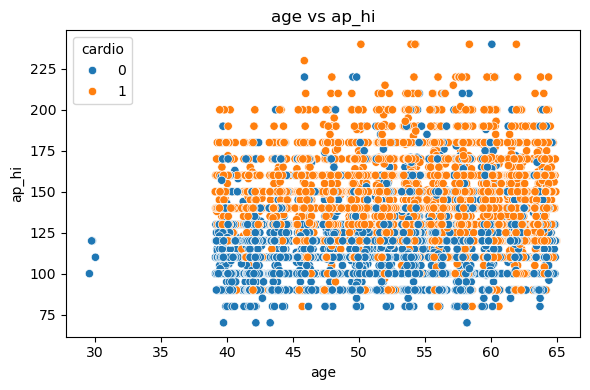

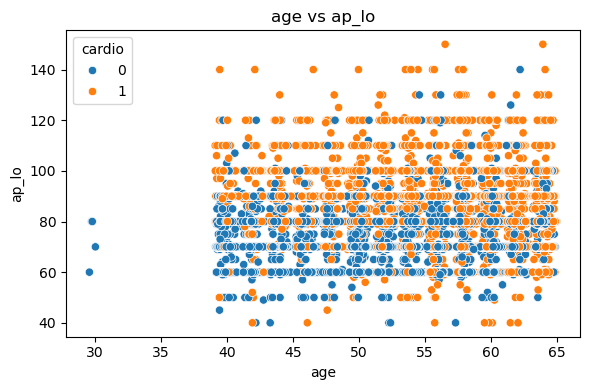

In [23]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='age', y='ap_hi', hue='cardio', data=df.sample(min(70000,len(df))))
plt.title('age vs ap_hi')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x='age', y='ap_lo', hue='cardio', data=df.sample(min(70000,len(df))))
plt.title('age vs ap_lo')
plt.tight_layout()
plt.show()

## Correlation Heatmap

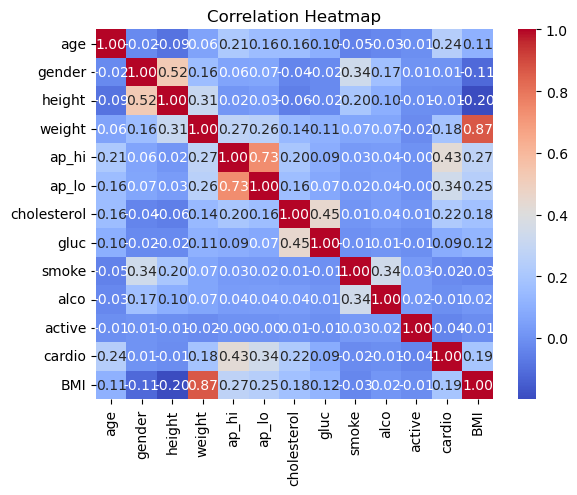

In [24]:
corr_matrix = df.corr(numeric_only=True)
plt.Figure(figsize=(20,12))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# WEEK 3

## Train Test Split

In [25]:
from sklearn.model_selection import train_test_split

x = df.drop(['cardio'],axis=1)
y = df['cardio']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

print(f"Training Shape (x): {x_train.shape}")
print(f"Testing Shape (x): {x_test.shape}")

Training Shape (x): (54735, 12)
Testing Shape (x): (13684, 12)


## Scalling and Logistic Regression using Pipeline

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [27]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000, random_state=0))
])


In [28]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=0))])

## Predictions

In [29]:
y_pred = pipeline.predict(x_test)
y_proba = pipeline.predict_proba(x_test)[:, 1]

## Accuracy of Model

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

72.92458345513008

## Model Evaluation: Metrics and Confusion Matrix

In [31]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix
)

In [32]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

cm = confusion_matrix(y_test, y_pred)

In [33]:
metrics = {
    "algorithm": "Logistic Regression",
    "accuracy": round(accuracy, 3),
    "precision": round(precision, 3),
    "recall": round(recall, 3),
    "f1_score": round(f1, 3),
    "roc_auc": round(roc_auc, 3),
    "confusion_matrix": {
        "tn": int(cm[0][0]),
        "fp": int(cm[0][1]),
        "fn": int(cm[1][0]),
        "tp": int(cm[1][1])
    }
}
metrics

{'algorithm': 'Logistic Regression',
 'accuracy': 0.729,
 'precision': 0.758,
 'recall': 0.665,
 'f1_score': 0.708,
 'roc_auc': np.float64(0.795),
 'confusion_matrix': {'tn': 5481, 'fp': 1437, 'fn': 2268, 'tp': 4498}}

# WEEK 4

## Performance Metrics Visualization

### Confusion Matrix Heatmap.

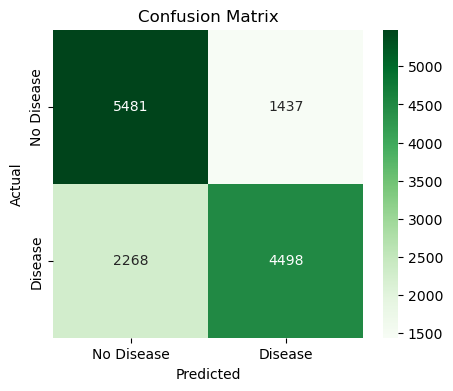

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


### ROC Curve

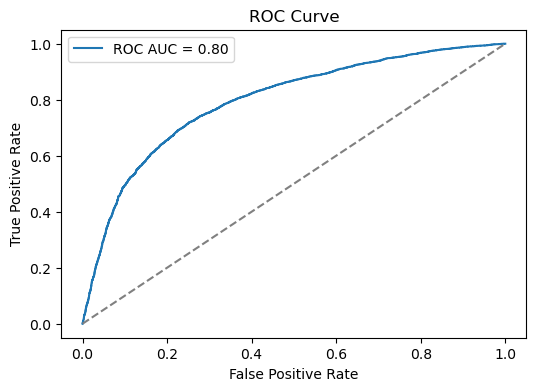

In [35]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


### Bar Chart of Evaluation Metrics

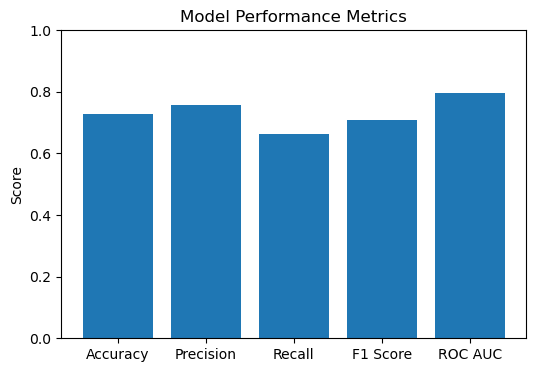

In [36]:
metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC": roc_auc
}

plt.figure(figsize=(6,4))
plt.bar(metrics.keys(), metrics.values())
plt.ylim(0,1)
plt.title("Model Performance Metrics")
plt.ylabel("Score")
plt.show()


## Saving trained model

In [38]:
import pickle
pickle.dump(pipeline, open("cardio_model.pkl", "wb"))
print("Model Saved")

Model Saved
